<a href="https://colab.research.google.com/github/aharoncooper/immune-cell-classification/blob/main/resnet_18_and_yolo_classification_hybrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Install Kaggle API
!pip install kaggle

# Set up Kaggle credentials (ensure you have uploaded `kaggle.json`)
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset directly to Colab
!kaggle datasets download masoudnickparvar/white-blood-cells-dataset --unzip -p /content/white_blood_cells

# Verify the dataset
import os
files = os.listdir("/content/white_blood_cells")
print("Files in dataset directory:", files)


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/white-blood-cells-dataset
License(s): copyright-authors
 99% 494M/499M [00:06<00:00, 20.8MB/s]
100% 499M/499M [00:06<00:00, 77.2MB/s]
Files in dataset directory: ['Test-B', 'Train', 'Test-A']


In [7]:
import os

# Specify the path where the folders are located
base_path = "/content/white_blood_cells"  # Change this to your actual path if needed

# Define the old and new folder names
old_name_a = os.path.join(base_path, "Test-A")
new_name_a = os.path.join(base_path, "Valid")

old_name_b = os.path.join(base_path, "Test-B")
new_name_b = os.path.join(base_path, "Test")

# Rename the folders
os.rename(old_name_a, new_name_a)
os.rename(old_name_b, new_name_b)

print("Folders renamed successfully.")


Folders renamed successfully.


In [8]:
import os
import shutil

# Define the paths for the folders
valid_path = "/content/white_blood_cells/Valid/Basophil"
test_path = "/content/white_blood_cells/Test/Basophil"

# Create the Basophil folder in the test directory if it doesn't exist
os.makedirs(test_path, exist_ok=True)

# List all images in the valid/Basophil folder
basophil_images = os.listdir(valid_path)

# Sort the images (optional, if you want to pick them in a specific order)
basophil_images.sort()

# Move the first 45 images from valid/Basophil to test/Basophil
for image in basophil_images[:45]:
    source = os.path.join(valid_path, image)
    destination = os.path.join(test_path, image)
    shutil.move(source, destination)

print("45 Basophil images moved to the Test folder.")


45 Basophil images moved to the Test folder.


In [9]:
import os
import shutil

# Define the paths for the folders
valid_path = "/content/white_blood_cells/Valid/Eosinophil"
test_path = "/content/white_blood_cells/Test/Eosinophil"

# Create the Eosinophil folder in the test directory if it doesn't exist
os.makedirs(test_path, exist_ok=True)

# List all images in the valid/Eosinophil folder
eosinophil_images = os.listdir(valid_path)

# Check if there are at least 160 images in valid/Eosinophil
if len(eosinophil_images) >= 160:
    # Move the first 160 images from valid/Eosinophil to test/Eosinophil
    for image in eosinophil_images[:160]:
        source = os.path.join(valid_path, image)
        destination = os.path.join(test_path, image)
        shutil.move(source, destination)
    print("160 Eosinophil images moved to the Test folder.")
else:
    print("Error: Not enough images in valid/Eosinophil to move 160 images.")


160 Eosinophil images moved to the Test folder.


In [10]:
import os
import shutil

# Define the paths for the folders
valid_path = "/content/white_blood_cells/Valid/Monocyte"
test_path = "/content/white_blood_cells/Test/Monocyte"

# Create the Monocyte folder in the test directory if it doesn't exist
os.makedirs(test_path, exist_ok=True)

# List all images in the valid/Monocyte folder
monocyte_images = os.listdir(valid_path)

# Check if there are at least 167 images in valid/Monocyte
if len(monocyte_images) >= 167:
    # Move the first 167 images from valid/Monocyte to test/Monocyte
    for image in monocyte_images[:167]:
        source = os.path.join(valid_path, image)
        destination = os.path.join(test_path, image)
        shutil.move(source, destination)
    print("167 Monocyte images moved to the Test folder.")
else:
    print("Error: Not enough images in valid/Monocyte to move 167 images.")


167 Monocyte images moved to the Test folder.


In [1]:
# Install required libraries
!pip install ultralytics fastai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 14.5 MB/s eta 0:00:00


In [2]:
# Install fastai
!pip install fastai

In [3]:
# Import necessary libraries
from ultralytics import YOLO
from fastai.vision.all import *
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Step 2: Load the YOLOv8 model
yolo_model = YOLO('/content/yolov8_best.pt')  # Replace with your YOLO model path

In [11]:
from fastai.vision.all import *

# Path to the trained model
model_path = '/content/best_model.pth'

# Recreate the DataLoaders object just to load the correct architecture (we won't use it for inference)
dls = ImageDataLoaders.from_folder(
    '/content',  # This is just a placeholder; we won't use it for inference
    valid_pct=0.2,  # You can ignore this for prediction
    item_tfms=Resize(224),
    bs=32
)

# Load the model architecture and weights
model = vision_learner(dls, resnet18, metrics=[accuracy])
model.load(model_path)
print("Model loaded successfully!")


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 148MB/s]


Model loaded successfully!


In [12]:
# Step 3: Classify each detected cell with Fastai
def classify_cells(img, model):
    pred_class, pred_idx, outputs = model.predict(img)
    return pred_class, outputs

In [13]:
from google.colab import files

# Step 2: Upload the image from your desktop using Google Colab
uploaded = files.upload() # Call the upload() method on the correct files object

# Get the uploaded image path
image_path = list(uploaded.keys())[0]

# Open the uploaded image and display it
img = Image.open(image_path)
img.show()

Saving Neutrophils-Count-What-is-it-Diagnosis-Treatment.jpg to Neutrophils-Count-What-is-it-Diagnosis-Treatment.jpg


In [14]:
# Step 3: Run YOLO for detection and classify cells
def detect_and_classify(image_path, yolo_model, model):
    # Load the image
    img = Image.open(image_path)

    # Run YOLO object detection on the image
    results = yolo_model(image_path)

    # Extract YOLO results (bounding boxes and labels)
    boxes = results[0].boxes.xyxy  # Bounding box coordinates
    labels = results[0].boxes.cls  # Predicted labels

    # Visualize the image and add bounding boxes
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img)

    # Loop through each detected cell and classify it
    for i, (box, label) in enumerate(zip(boxes, labels)):
        x1, y1, x2, y2 = box.tolist()  # Get bounding box coordinates

        # Convert the box coordinates to integers
        x1, y1, x2, y2 = map(int, [round(x1), round(y1), round(x2), round(y2)])

        # Draw bounding box on the image
        rect = patches.Rectangle(
            (x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none'
        )
        ax.add_patch(rect)

        # Crop the detected cell region
        cell_img = img.crop((x1, y1, x2, y2))

        # Classify the cropped cell using Fastai model
        pred_class, outputs = classify_cells(cell_img, model)

        # Display predicted class and confidence score
        ax.text(
            x1, y1 - 10, f'{pred_class}: {outputs.max():.2f}', color='red', fontsize=12
        )

    # Show the image with bounding boxes and predicted classes
    plt.show()


image 1/1 /content/Neutrophils-Count-What-is-it-Diagnosis-Treatment.jpg: 448x640 12 WBCs, 618.3ms
Speed: 15.5ms preprocess, 618.3ms inference, 37.1ms postprocess per image at shape (1, 3, 448, 640)


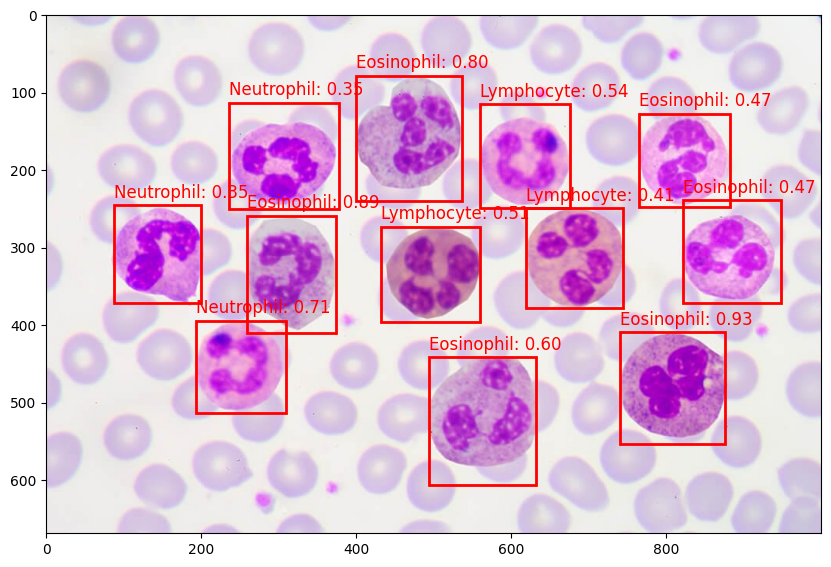

In [15]:
# Run YOLO detection and Fastai classification
detect_and_classify(image_path, yolo_model, model)